In [17]:
import sys
sys.path.insert(0,"../../../utilities/")
import data_utils
import os
import numpy as np
import seaborn as sns
import scipy.stats as st

project_path = "/media/nedooshki/f4f0aea6-900a-437f-82e1-238569330477/genome-structure-function-aggregation"
data_path = os.path.join(project_path, "data")
hic_path = os.path.join(data_path, "K562/Hi-C/hg38/4DNFITUOMFUQ.hic")
dump_dir = os.path.join(data_path, "K562/Hi-C/hg38")

In [ ]:
for chr1 in np.arange(1,23):
    for chr2 in np.arange(chr1,23):
        data_utils.dump_hic(hic_path, str(chr1), str(chr2),'25000','oe',dump_dir)

In [5]:
hic_data = data_utils.create_contact_list_woInd(data_path, 'K562', 'chr17', 'chr17', 100000, 'oe', 'hg38')

In [23]:
weights = np.log2(hic_data['weight'])
dist_params = st.exponweib.fit(weights)
p_value = 0.99999
th = st.exponweib.ppf(p_value, dist_params[0], dist_params[1], dist_params[2], dist_params[3])
ratio_significant = len(weights[weights>th])/len(weights)

In [24]:
ratio_significant

0.0018175018437158127

/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

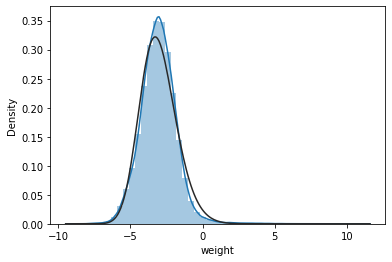

In [20]:
sns.distplot(weights, fit = st.exponweib)

(102.74116911703186, 28.89546308896098, -160.57775937466863, 148.9275059329358)